#Convolutional Neural Network

Importing The Libraries

In [167]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models

In [168]:
tf.__version__

'2.18.0'

#Data Preprocessing

In [169]:
#Preprocessing the Training Set

train_datagen = ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True
    )

training_set = train_datagen.flow_from_directory(
    'dataset/training_set',
    target_size = (64, 64),
    batch_size = 32,
    class_mode = 'binary'
    )

Found 8000 images belonging to 2 classes.


In [170]:
#Preprocessing the Test Set
test_datagen = ImageDataGenerator(rescale = 1./255)

test_set = test_datagen.flow_from_directory(
    'dataset/test_set',
    target_size = (64, 64),
    batch_size = 32,
    class_mode = 'binary'
    )

Found 2000 images belonging to 2 classes.


#Building The CNN

In [171]:
#Initialising the CNN
cnn = models.Sequential()
cnn.add(layers.Input(shape=(64,64,3)))
#Convolution
cnn.add(layers.Conv2D(filters=32, kernel_size=3, activation='relu'))

#Pooling
cnn.add(layers.MaxPool2D(pool_size=2, strides=2))

#Adding more convolutional layers
cnn.add(layers.Conv2D(32, (3,3)))  
cnn.add(layers.Activation('relu'))
cnn.add(layers.MaxPool2D((2,2)))

#Flatelling
cnn.add(layers.Flatten())

#Full Connection
cnn.add(layers.Dense(units=128)) 
cnn.add(layers.Activation('relu'))

#Output Layer
cnn.add(layers.Dense(1, activation='sigmoid'))

#Training the CNN

In [172]:
#Compiling the CNN
cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

#Training the CNN
early_stop = EarlyStopping(monitor='val_loss', patience=4, restore_best_weights=True)
history = cnn.fit(x = training_set, validation_data = test_set, epochs = 25, callbacks = [early_stop])

Epoch 1/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 21s 79ms/step - accuracy: 0.5327 - loss: 0.7137 - val_accuracy: 0.5260 - val_loss: 0.6952
Epoch 2/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 18s 72ms/step - accuracy: 0.6189 - loss: 0.6542 - val_accuracy: 0.6245 - val_loss: 0.6315
Epoch 3/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 18s 72ms/step - accuracy: 0.6818 - loss: 0.5882 - val_accuracy: 0.7100 - val_loss: 0.5763
Epoch 4/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 19s 75ms/step - accuracy: 0.7248 - loss: 0.5482 - val_accuracy: 0.6955 - val_loss: 0.5674
Epoch 5/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 18s 71ms/step - accuracy: 0.7394 - loss: 0.5118 - val_accuracy: 0.7580 - val_loss: 0.5103
Epoch 6/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 18s 71ms/step - accuracy: 0.7672 - loss: 0.4865 - val_accuracy: 0.7605 - val_loss: 0.5023
Epoch 7/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 18s 71ms/step - accuracy: 0.7687 - loss: 0.4721 - val_accuracy: 0.7725 - val_loss: 0.4987
Epoch 8/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 18s 72ms/step - accuracy: 0.7926 - loss: 0.4446 - 

#Plotting the graphs

In [173]:
#Getting the History Data
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

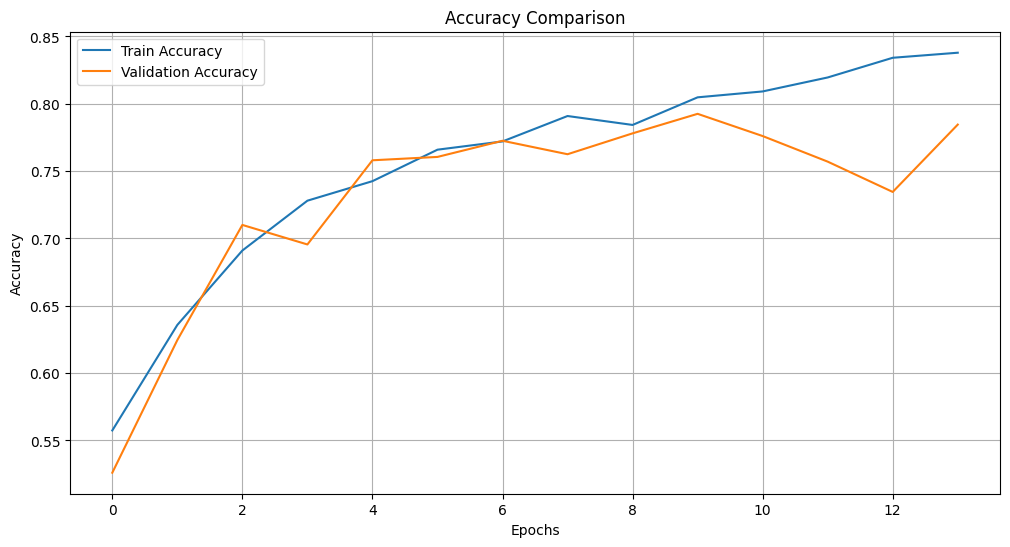

In [174]:
#Precision Graphic
plt.figure(figsize=(12, 6))
plt.plot(accuracy, label='Train Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.title('Accuracy Comparison')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

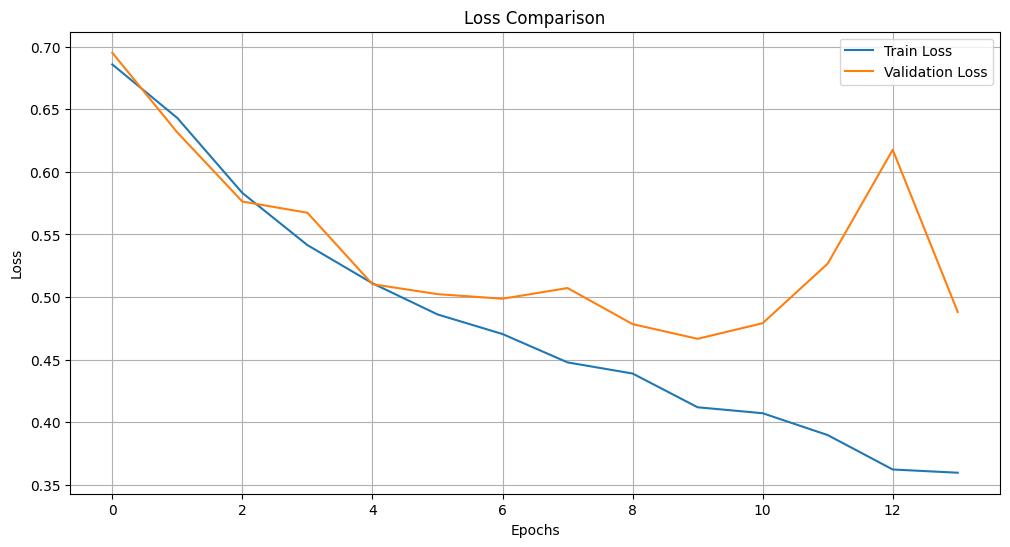

In [175]:
#Loss Graphic
plt.figure(figsize=(12, 6))
plt.plot(loss, label='Train Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Loss Comparison')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

#Making a Single Prediction - Cat

In [176]:
test_image = image.load_img('dataset/prediction/cat.jpeg', target_size = (64, 64))
test_image = test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
training_set.class_indices

if result[0][0] == 1:
  prediction = 'dog'
else:
  prediction = 'cat'

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


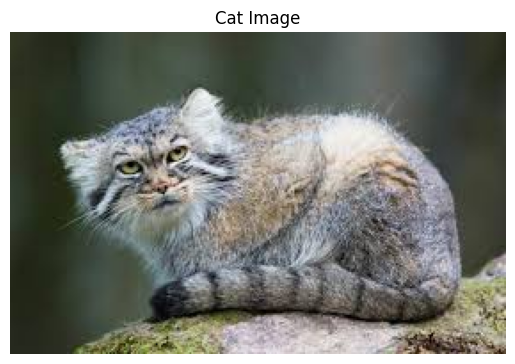

In [177]:
cat_image = image.load_img('dataset/prediction/cat.jpeg')
plt.imshow(cat_image)
plt.axis("off")
plt.title("Cat Image")
plt.show()

In [178]:
print("The imagem above is of a ", prediction)

The imagem above is of a  cat


#Making a Single Prediction - Dog

In [179]:
test_image = image.load_img('dataset/prediction/dog.jpeg', target_size = (64, 64))

test_image = dog_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
training_set.class_indices

if result[0][0] == 1:
  prediction = 'dog'
else:
  prediction = 'cat'

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


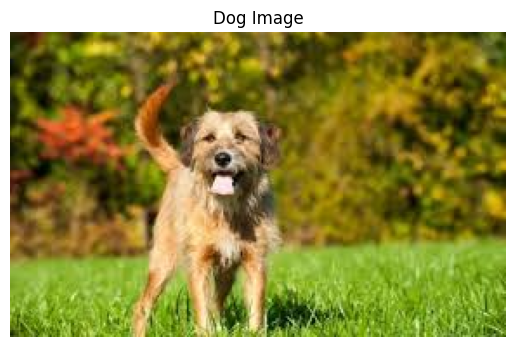

In [180]:
dog_image = image.load_img('dataset/prediction/dog.jpeg')
plt.imshow(dog_image)
plt.axis("off")
plt.title("Dog Image")
plt.show()

In [181]:
print("The imagem above is of a ", prediction)

The imagem above is of a  dog
